<a href="https://colab.research.google.com/github/AlaaIraqy/SignatureRecognition/blob/main/%D9%8DSignatureVgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 323 kB 5.4 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=f2833235728bfdae3e90603ff508481e1977cfb03ba0e01b999f36835d05ff68
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.42-py3-none-any.whl size=322677 sha256=f88866246c1d37cf54fae2cebf79d1e813888f39f8f8db59d36107128c7cf2ca
  Stored in directory: /root/.cache/pip/wheels/97/31/a0/5ddbb26189896b5d23d83b03bf9a74327a8091a610a6375785
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=5ff483fe8c5c0ae44deb4804218285c5d802c22bd5740c0039ace8054f81a54e
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successful

In [3]:
# General
import gc, os
import numpy as np
from tqdm.notebook import tqdm, trange
import cv2

# Machine Learning
import tensorflow as tf
from keras import Model
import keras
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_keras_history import plot_history

# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Conv2DTranspose, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import RMSprop,Adam

In [4]:
!unzip '/content/drive/MyDrive/signatureData/UTSig.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: UTSig/Forgery/Simple/75/52.tif  
  inflating: UTSig/Forgery/Simple/75/53.tif  
  inflating: UTSig/Forgery/Simple/75/54.tif  
  inflating: UTSig/Forgery/Simple/75/55.tif  
  inflating: UTSig/Forgery/Simple/75/56.tif  
  inflating: UTSig/Forgery/Simple/75/61.tif  
  inflating: UTSig/Forgery/Simple/75/62.tif  
  inflating: UTSig/Forgery/Simple/75/63.tif  
  inflating: UTSig/Forgery/Simple/75/64.tif  
  inflating: UTSig/Forgery/Simple/75/65.tif  
  inflating: UTSig/Forgery/Simple/75/66.tif  
   creating: UTSig/Forgery/Simple/76/
  inflating: UTSig/Forgery/Simple/76/11.tif  
  inflating: UTSig/Forgery/Simple/76/12.tif  
  inflating: UTSig/Forgery/Simple/76/13.tif  
  inflating: UTSig/Forgery/Simple/76/14.tif  
  inflating: UTSig/Forgery/Simple/76/15.tif  
  inflating: UTSig/Forgery/Simple/76/16.tif  
  inflating: UTSig/Forgery/Simple/76/21.tif  
  inflating: UTSig/Forgery/Simple/76/22.tif  
  inflating: UTSig/Forgery/Simple/76/

In [5]:
whole_data = []
for i in range(1,116):
  path = "/content/UTSig/Genuine/"+str(i)
  paths = os.listdir(path)
  paths.sort()
  for image in (paths):
    img = cv2.imread(path + '/' + image)
    img = cv2.resize(img, (299,299), interpolation=cv2.INTER_AREA)
    whole_data.append(img)

(3105, 299, 299, 3)
(299, 299, 3)


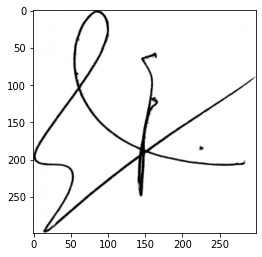

In [6]:
whole_data = np.array(whole_data)
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(whole_data[0], cv2.COLOR_BGR2RGB))
print(whole_data.shape)
print(np.shape(whole_data[0]))

In [7]:
# train=18, validation=4, test=5
training_data=[]
validation_data=[]
test_data=[]

training_labels=[]
validation_labels=[]
test_labels=[]

start=0
ii=18
jj=22
kk=27
idx=0

for persons in range(115):
  label=np.zeros((115))
  label[persons]=1
  for i in range(start,ii):
    training_data.append(whole_data[i])
    training_labels.append(label)
    idx+=1
  for j in range(ii,jj):
    validation_data.append(whole_data[j])
    validation_labels.append(label)
    idx+=1
  for k in range(jj,kk):
    test_data.append(whole_data[k])
    test_labels.append(label)
    idx+=1
  start+=27
  ii+=27
  jj+=27
  kk+=27

 


(575, 115)
(575, 299, 299, 3)
(460, 115)
(460, 299, 299, 3)
(2070, 115)
(2070, 299, 299, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


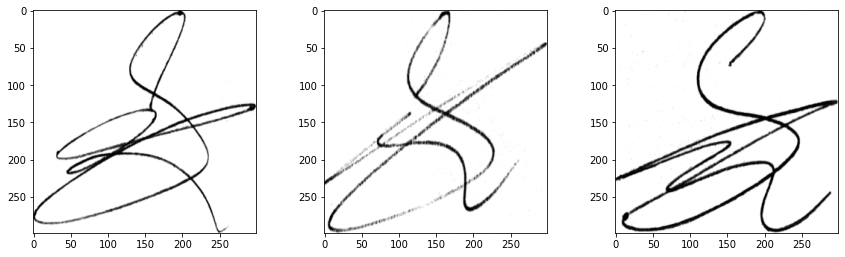

In [8]:
training_data=np.array(training_data)
validation_data=np.array(validation_data)
test_data=np.array(test_data)
training_labels=np.array(training_labels)
validation_labels=np.array(validation_labels)
test_lables=np.array(test_labels)

print(test_lables.shape)
print(test_data.shape)
print(validation_labels.shape)
print(validation_data.shape)
print(training_labels.shape)
print(training_data.shape)

# print(test_labels.shape)
print(training_labels[2069])
print(validation_labels[459])

plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(test_data[574], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,2)
plt.imshow(cv2.cvtColor(training_data[2069], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(validation_data[459], cv2.COLOR_BGR2RGB))

In [9]:
# input_shape=(299,299,3)
# new_input = keras.Input(shape=input_shape)
# vgg = VGG16(include_top=False, input_tensor=new_input, classes=115)
# output = vgg.layers[-1].output
# output = keras.layers.Flatten()(output)
# vgg = Model(vgg.input, output)
model = VGG16(include_top=False, weights='imagenet', input_shape=(299, 299, 3))
for layer in model.layers:
   layer.trainable = False
# vgg.summary()
flat1 = GlobalAveragePooling2D()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
dropout1 = Dropout(0.1)(class1)
output = Dense(115, activation='softmax')(dropout1)

model = Model(inputs=model.inputs, outputs=output)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                              

Epoch 1/50
65/65 [==============================] - 43s 426ms/step - loss: 5.3221 - accuracy: 0.0464 - val_loss: 3.6176 - val_accuracy: 0.1870
Epoch 2/50
65/65 [==============================] - 23s 349ms/step - loss: 3.0548 - accuracy: 0.3097 - val_loss: 2.1802 - val_accuracy: 0.6370
Epoch 3/50
65/65 [==============================] - 23s 354ms/step - loss: 1.7690 - accuracy: 0.6493 - val_loss: 1.3060 - val_accuracy: 0.8217
Epoch 4/50
65/65 [==============================] - 24s 373ms/step - loss: 1.0560 - accuracy: 0.8068 - val_loss: 0.8609 - val_accuracy: 0.8935
Epoch 5/50
65/65 [==============================] - 24s 369ms/step - loss: 0.6850 - accuracy: 0.9005 - val_loss: 0.6069 - val_accuracy: 0.9261
Epoch 6/50
65/65 [==============================] - 23s 361ms/step - loss: 0.4583 - accuracy: 0.9377 - val_loss: 0.4776 - val_accuracy: 0.9261
Epoch 7/50
65/65 [==============================] - 24s 365ms/step - loss: 0.3278 - accuracy: 0.9638 - val_loss: 0.3975 - val_accuracy: 0.9370

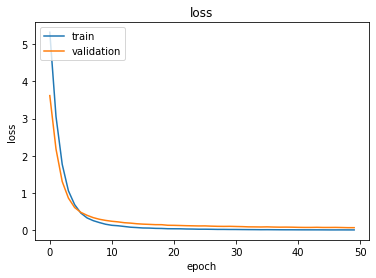

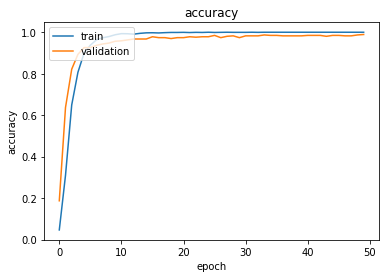

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
result = model.fit(training_data.astype(np.float32),training_labels.astype(np.float32),
                    validation_data=(validation_data.astype(np.float32), validation_labels.astype(np.float32)),
                    batch_size=32,
                    epochs=50,
                    verbose=1)

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [11]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)
res = model.evaluate(test_data.astype(np.float32), test_labels.astype(np.float32), batch_size= 32)
print('____________stats on test____________')
print('Accuracy:  |   {:.2f}  |'.format(res[1]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))

18/18 [==============================] - 11s 609ms/step - loss: 0.1042 - accuracy: 0.9739
____________stats on test____________
Accuracy:  |   97.39  |
Loss:      |   10.42  |
